# Neural Networks for Classification

In this notebook we are going to explore the use of Neural Networks for image classification. We are going to use a dataset of small images of clothes and accessories, the Fashion MNIST. You can find more information regarding the dataset here: https://pravarmahajan.github.io/fashion/

Each instance in the dataset consist of an image, in a format similar to the digit images you have seen in the previous homework, and a label. The labels correspond to the type of clothing, as follows:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Let's first load the required packages.

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

The following is a function to load the data, that we are going to use later in the notebook.

In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_fashion_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

## TO DO 0
Place your ID ("numero di matricola") that will be used as seed for random generator. Change the ID number in case you observe unexpected behaviours and want to test if this is due to randomization (e.g., train/test split). If you change the ID number explain here why you have changed it.

In [3]:
ID = 2074282 # COMPLETE
np.random.seed(ID)

Now we load the dataset using the function above.

In [4]:
#load the fashion MNIST dataset and normalize the features so that each value is in [0,1]
X, y = load_fashion_mnist("data")
# rescale the data
X = X / 255.0

Now we split the data into training and test. Make sure that each label is present at least 10 times
in the training set.

In [5]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rest as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [47 50 52 46 50 43 42 59 58 53]


The following function plots an image and the corresponding label, to be used to inspect the data when needed.

In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

Now let's test the function above and check few images.

INPUT:


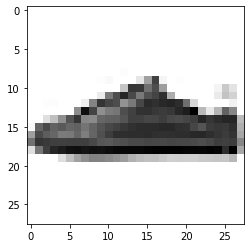

LABEL: 7
INPUT:


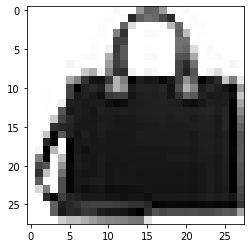

LABEL: 8
INPUT:


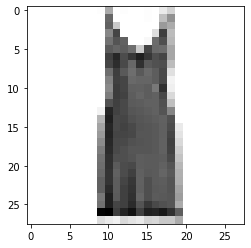

LABEL: 3


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,300)

### TO DO 1

Now use a (feed-forward) Neural Network for prediction. Use the multi-layer perceptron (MLP) classifier MLPClassifier(...) in scikit-learn, with the following parameters: max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, verbose=True, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization parameter for L2 regularization that is used by the MLP in sklearn, and verbose=True allows you to see how loss changes in iterations (note that the loss used by the MLPClassifier may be different from the 0-1 loss, also called accuracy).

Then, using the default activation function, we consider four architectures, with different numbers of hidden layers and different sizes. To evaluate the architectures we use the GridSearchCV with a 5-fold cross-validation, and use the results to pick the best architecture.


In [8]:
#MLPclassifier requires in input the parameter hidden_layer_sizes, that is a tuple specifying the number of 
#neurons in the hidden layers; for example: (10,) means that there is only 1 hidden layer with 10 neurons; 
#(10,50) means that there are 2 hidden layers, the first with 10 neurons, the second with 50 neurons

hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]}

mlp_cv = GridSearchCV(MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, verbose=True, random_state=ID), hl_parameters, cv=5, n_jobs=-1) #ADD YOUR CODE
    
mlp_cv.fit(X_train, y_train)

Iteration 1, loss = 2.12533326
Iteration 2, loss = 1.36524179
Iteration 3, loss = 1.10610708
Iteration 4, loss = 1.21499675
Iteration 5, loss = 0.88985055
Iteration 6, loss = 0.73729839
Iteration 7, loss = 0.61668635
Iteration 8, loss = 0.58111174
Iteration 9, loss = 0.54883037
Iteration 10, loss = 0.52399009
Iteration 11, loss = 0.45095286
Iteration 12, loss = 0.42680093
Iteration 13, loss = 0.47065669
Iteration 14, loss = 0.39446461
Iteration 15, loss = 0.36239072
Iteration 16, loss = 0.44014482
Iteration 17, loss = 0.37534620
Iteration 18, loss = 0.28572528
Iteration 19, loss = 0.29150624
Iteration 20, loss = 0.24401552
Iteration 21, loss = 0.24924895
Iteration 22, loss = 0.24482412
Iteration 23, loss = 0.22893896
Iteration 24, loss = 0.18433780
Iteration 25, loss = 0.23092047
Iteration 26, loss = 0.16430675
Iteration 27, loss = 0.15643207
Iteration 28, loss = 0.19568622
Iteration 29, loss = 0.21982900
Iteration 30, loss = 0.12309093
Iteration 31, loss = 0.12311513
Iteration 32, los

GridSearchCV(cv=5,
             estimator=MLPClassifier(learning_rate_init=0.1, max_iter=300,
                                     random_state=2074282, solver='sgd',
                                     verbose=True),
             n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(10,), (50,), (10, 10),
                                                (50, 50)]})

In [9]:
print ('RESULTS FOR NN\n')

print("Best parameters set found:")
#ADD YOUR CODE
print(mlp_cv.best_params_)
#

print("Score with best parameters:")
#ADD YOUR CODE
print(mlp_cv.best_score_)
#

print("\nAll scores on the grid:")
#ADD YOUR CODE
import pandas as pd
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(mlp_cv.cv_results_)
#

RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (50,)}
Score with best parameters:
0.7780000000000001

All scores on the grid:


{'mean_fit_time': array([1.22460303, 1.54519863, 0.4920012 , 0.71900978]),
 'std_fit_time': array([0.41877449, 0.10275932, 0.07949792, 0.19537069]),
 'mean_score_time': array([0.00119858, 0.00200038, 0.00160065, 0.00139537]),
 'std_score_time': array([4.02905204e-04, 1.49577972e-06, 4.90597233e-04, 8.02690195e-04]),
 'param_hidden_layer_sizes': masked_array(data=[(10,), (50,), (10, 10), (50, 50)],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'hidden_layer_sizes': (10,)},
  {'hidden_layer_sizes': (50,)},
  {'hidden_layer_sizes': (10, 10)},
  {'hidden_layer_sizes': (50, 50)}],
 'split0_test_score': array([0.74, 0.79, 0.63, 0.74]),
 'split1_test_score': array([0.76, 0.81, 0.71, 0.82]),
 'split2_test_score': array([0.72, 0.73, 0.67, 0.73]),
 'split3_test_score': array([0.75, 0.78, 0.65, 0.7 ]),
 'split4_test_score': array([0.56, 0.78, 0.3 , 0.77]),
 'mean_test_score': array([0.706, 0.778, 0.592, 0.752]),
 'std_test_score'

## TO DO 2

What do you observe for different architectures and their scores? How do the number of layers and their sizes affect the performances?

[ADD YOUR ANSWER HERE]

From the test I observe that with 50 nodes and one hidden layer we obtain a better score than the other casistics. This is because one hidden layer is sufficient for the large majority of problems and adding another one will not lead to better performance. With only 10 nodes in the hidden layer the architecture have a worse sensitivity, but we observe that with one hidden layer we obtain a better score than 2 hidden layers with 10 nodes each.

## TO DO 3

Now get training and test error (according to the initial split) for a NN with best parameters chosen from the cross-validation above. Use the attribute *best_estimator_* to pick the best architecture already re-trained on the training dataset (more infos in the documentation of GridSearchCV).

In [10]:
#get training and test error for the best NN model from CV

mlp = mlp_cv.best_estimator_.fit(X_train, y_train) #ADD YOUR CODE

training_error = 1 - mlp.score(X_train, y_train) #ADD YOUR CODE

test_error = 1 - mlp.score(X_test, y_test) #ADD YOUR CODE

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

Iteration 1, loss = 2.12533326
Iteration 2, loss = 1.36524179
Iteration 3, loss = 1.10610708
Iteration 4, loss = 1.21499675
Iteration 5, loss = 0.88985055
Iteration 6, loss = 0.73729839
Iteration 7, loss = 0.61668635
Iteration 8, loss = 0.58111174
Iteration 9, loss = 0.54883037
Iteration 10, loss = 0.52399009
Iteration 11, loss = 0.45095286
Iteration 12, loss = 0.42680093
Iteration 13, loss = 0.47065669
Iteration 14, loss = 0.39446461
Iteration 15, loss = 0.36239072
Iteration 16, loss = 0.44014482
Iteration 17, loss = 0.37534620
Iteration 18, loss = 0.28572528
Iteration 19, loss = 0.29150624
Iteration 20, loss = 0.24401552
Iteration 21, loss = 0.24924895
Iteration 22, loss = 0.24482412
Iteration 23, loss = 0.22893896
Iteration 24, loss = 0.18433780
Iteration 25, loss = 0.23092047
Iteration 26, loss = 0.16430675
Iteration 27, loss = 0.15643207
Iteration 28, loss = 0.19568622
Iteration 29, loss = 0.21982900
Iteration 30, loss = 0.12309093
Iteration 31, loss = 0.12311513
Iteration 32, los

## More data 
Now let's do the same but using 10000 (or less if it takes too long on your machine) data points for training. Use the same NN architectures as before.

In [11]:
X = X[permutation]
y = y[permutation]

m_training = 10000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts=True)

Labels and frequencies in training dataset: 


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1067, 1014, 1029,  996,  961,  941,  994, 1055,  996,  947],
       dtype=int64))

## TO DO 4

Now train the NNs with the added data points. This time you can run for 100 iterations if you cannot run for 300 iterations.

In [12]:
#for NN we try the same architectures as before
hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]}

mlp_large_cv = GridSearchCV(MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, verbose=True, random_state=ID), hl_parameters, cv=5, n_jobs=-1) #ADD YOUR CODE

mlp_large_cv.fit(X_train, y_train)

Iteration 1, loss = 0.93362117
Iteration 2, loss = 0.52247546
Iteration 3, loss = 0.44966622
Iteration 4, loss = 0.41060144
Iteration 5, loss = 0.38250827
Iteration 6, loss = 0.36544901
Iteration 7, loss = 0.34997029
Iteration 8, loss = 0.33257958
Iteration 9, loss = 0.32611946
Iteration 10, loss = 0.31310165
Iteration 11, loss = 0.29694352
Iteration 12, loss = 0.28701497
Iteration 13, loss = 0.27839899
Iteration 14, loss = 0.26555272
Iteration 15, loss = 0.25815951
Iteration 16, loss = 0.25347947
Iteration 17, loss = 0.24042323
Iteration 18, loss = 0.22850270
Iteration 19, loss = 0.23218206
Iteration 20, loss = 0.22752236
Iteration 21, loss = 0.21593560
Iteration 22, loss = 0.21301002
Iteration 23, loss = 0.20690577
Iteration 24, loss = 0.20323148
Iteration 25, loss = 0.20513724
Iteration 26, loss = 0.18898356
Iteration 27, loss = 0.18929747
Iteration 28, loss = 0.17841229
Iteration 29, loss = 0.16930795
Iteration 30, loss = 0.17631418
Iteration 31, loss = 0.17136825
Iteration 32, los

GridSearchCV(cv=5,
             estimator=MLPClassifier(learning_rate_init=0.1, max_iter=300,
                                     random_state=2074282, solver='sgd',
                                     verbose=True),
             n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(10,), (50,), (10, 10),
                                                (50, 50)]})

In [13]:
print ('RESULTS FOR NN\n')

print("Best parameters set found:")
#ADD YOUR CODE
print(mlp_large_cv.best_params_)
#

print("Score with best parameters:")
#ADD YOUR CODE
print(mlp_large_cv.best_score_)
#

print("\nAll scores on the grid:")
#ADD YOUR CODE
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(mlp_large_cv.cv_results_)
#

RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (50,)}
Score with best parameters:
0.8427

All scores on the grid:


{'mean_fit_time': array([12.68020163, 27.63119822,  9.17519984, 19.85599809]),
 'std_fit_time': array([0.39107699, 5.5768916 , 1.92420652, 2.96732255]),
 'mean_score_time': array([0.01139989, 0.0156004 , 0.01139851, 0.01100011]),
 'std_score_time': array([0.00102048, 0.00049023, 0.00080099, 0.00209797]),
 'param_hidden_layer_sizes': masked_array(data=[(10,), (50,), (10, 10), (50, 50)],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'hidden_layer_sizes': (10,)},
  {'hidden_layer_sizes': (50,)},
  {'hidden_layer_sizes': (10, 10)},
  {'hidden_layer_sizes': (50, 50)}],
 'split0_test_score': array([0.786 , 0.825 , 0.792 , 0.8335]),
 'split1_test_score': array([0.8125, 0.8485, 0.8055, 0.8505]),
 'split2_test_score': array([0.811 , 0.849 , 0.779 , 0.8385]),
 'split3_test_score': array([0.8075, 0.8485, 0.812 , 0.8315]),
 'split4_test_score': array([0.8045, 0.8425, 0.759 , 0.8435]),
 'mean_test_score': array([0.8043, 0.8427, 0.7

## TO DO 5
Describe your architecture choices and the results you observe with respect to the architectures you used.

#### Architecture description
The architecture used as Multilayer Perceptron Classifier is the one with only one hidden layer with 50 neurons in it. I choose *A*(50,) because in the 5-fold cross validation the mean of the score of this architecture is better than the other three.

#### Results
From the test I observe that architectures with only 10 neurons in hidden layers ( *A*(10), *A*(10,10) ) have worst scores than the ones with 50 neurons ( *A*(50), *A*(50,50) ). This result arises from the fact that with only 10 neurons the NN doesn't have the number of weights needed to perform as well as the other architecture with this dataset. Infact the ratio between architectures scores indicate that there's better results from *i)* 5% to *ii)* 6,7% choosing *A*(50,) instead of *i)* *A*(10,) or *ii)* *A*(10,10), and even with *A*(50,50) there's a better sensitivity (slightly less then the one with one hidden layer).

*A*(n,m):=architecture with n neurons on 1st hidden layer and m in 2nd.

## TO DO 6

Get the train and test error for the best NN you obtained with 10000 points. 

In [14]:
#get training and test error for the best NN model from CV

best_mlp_large = mlp_large_cv.best_estimator_.fit(X_train, y_train) #ADD YOUR CODE

training_error = 1 - best_mlp_large.score(X_train, y_train) #ADD YOUR CODE

test_error = 1 - best_mlp_large.score(X_test, y_test) #ADD YOUR CODE

print ('RESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

Iteration 1, loss = 0.93362117
Iteration 2, loss = 0.52247546
Iteration 3, loss = 0.44966622
Iteration 4, loss = 0.41060144
Iteration 5, loss = 0.38250827
Iteration 6, loss = 0.36544901
Iteration 7, loss = 0.34997029
Iteration 8, loss = 0.33257958
Iteration 9, loss = 0.32611946
Iteration 10, loss = 0.31310165
Iteration 11, loss = 0.29694352
Iteration 12, loss = 0.28701497
Iteration 13, loss = 0.27839899
Iteration 14, loss = 0.26555272
Iteration 15, loss = 0.25815951
Iteration 16, loss = 0.25347947
Iteration 17, loss = 0.24042323
Iteration 18, loss = 0.22850270
Iteration 19, loss = 0.23218206
Iteration 20, loss = 0.22752236
Iteration 21, loss = 0.21593560
Iteration 22, loss = 0.21301002
Iteration 23, loss = 0.20690577
Iteration 24, loss = 0.20323148
Iteration 25, loss = 0.20513724
Iteration 26, loss = 0.18898356
Iteration 27, loss = 0.18929747
Iteration 28, loss = 0.17841229
Iteration 29, loss = 0.16930795
Iteration 30, loss = 0.17631418
Iteration 31, loss = 0.17136825
Iteration 32, los

## TO DO 7

Compare the train and test error you got with a large number of samples with the best one you obtained with only 500 data points. Are the architectures the same or do they differ? What about the errors you get?

[ADD YOUR ANSWER HERE]

From my tests I found out that with both 500 and 10k samples the better architecture is *A*(50,). More precisely in both cases the architecture scores ranking is:
1. *A*(50,)
    * 500 samples: 0.778
    * 10k samples: 0.8427
2. *A*(50,50)
    * 500 samples: 0.752
    * 10k samples: 0.8395
3. *A*(10,)
    * 500 samples: 0.706
    * 10k samples: 0.8043
4. *A*(10,10)
    * 500 samples: 0.592
    * 10k samples: 0.7895
*A*(n,m):=architecture with n neurons on 1st hidden layer and m in 2nd.

Table with errors comparison:

<table>
  <tr>
    <td></td>
    <th>Training error</th>
    <th>Test error</th>
  </tr>
  <tr>
    <th>500</th>
    <td>0</td>
    <td>0.224387</td>
  </tr>
  <tr>
    <th>10k</th>
    <td>0.0775</td>
    <td>0.16144</td>
  </tr>
</table>

From the table I observe that the classificator with only 500 samples in input for training might overfitting, since training error is 0% and test error is 22,4%. With 10k samples instead we have that training error raises at 7,7% but test error decreases at 16,1%.

## TO DO 8

Plot an image that was missclassified by NN with m=500 training data points and it is now instead correctly classified by NN with m=10000 training data points.

INPUT:


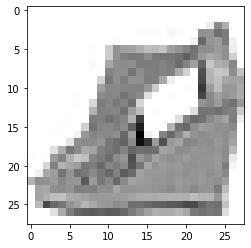

LABEL: 5
Misclassified with m=500:  8
Correctly classified with m=10000: 5


In [15]:
#ADD YOUR CODE
prediction_500 = mlp.predict(X_test)
prediction_10k = best_mlp_large.predict(X_test)

misclassified = np.where(y_test != prediction_500)[0]
classified = np.where(y_test == prediction_10k)[0]
index = -1
for i in classified:
    if index != -1:
        break
    for j in misclassified:
        if index != -1:
            break
        if i == j:
            index = i

plot_input(X_test, y_test, index)
print("Misclassified with m=500: ", prediction_500[index])
print("Correctly classified with m=10000:", prediction_10k[index])
#

Let's plot some of the weigths of the multi-layer perceptron classifier, for the best NN we get with 500 data points and with 10000 data points. The code below plots the weights in a matrix form, where a figure represents all the weights of the edges entering in a hidden node. Notice that the code assumes that the NNs are called "mlp" and "best_mlp_large": you may need to replace such variables with your variable names. 



Weights with 500 data points:


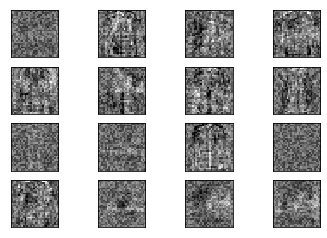

Weights with 10000 data points:


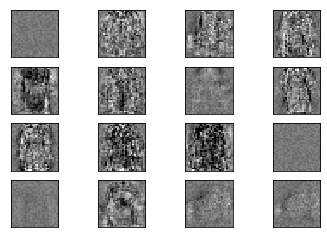

In [16]:
print("Weights with 500 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 10000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_mlp_large.coefs_[0].min(), best_mlp_large.coefs_[0].max()
for coef, ax in zip(best_mlp_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## TO DO 9

Describe what do you observe by looking at the weights.

[ADD YOUR ANSWER HERE]

Comparing the two images of weights I observe less noise in the one with 10k samples, resulting in a more gradual transition between cells colours. Furthermore I notice that in some weights off the second group I can recognize a blurry version off some dresses.

## TO DO 10

Pick another classifier among the ones we have seen previously (SVM or something else). Report the training and test error for such classifier with 10000 samples in the training set, if possible; if the classifier cannot run with so many data sample reduce the number of samples.

*Note*: if there are parameters to be optimized use cross-validation. If you choose SVM, you can decide if you want to use a single kernel or use the best among many; in the latter case, you need to pick the best kernel using cross-validation (using the functions available in sklearn).

**[WRITE HERE WHAT CLASSIFIER YOU ARE CHOOSING AND WHAT PARAMETERS YOU NEED TO SET.]**

I choose the Support Vector classifier and I test *rbf* and *poly* kernels with parameter *C*=[1,10,100] and *gamma*=[0.001,0.01,0.1] to find the best ones.

In [17]:
# ADD YOUR CODE
from sklearn.svm import SVC

param_grid = {'C':[1,10,100],'gamma':[0.001,0.01,0.1],'kernel':['rbf','poly']}
model = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1)

In [18]:
model.fit(X_train, y_train)
#svm = model.best_estimator_
print("Other classifier (SVM) parameter:", model.best_params_)

Other classifier (SVM) parameter: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [19]:
svm = model.best_estimator_.fit(X_train, y_train)
#

training_error_other = 1 - svm.score(X_train, y_train) #ADD YOUR CODE

test_error_other = 1 - svm.score(X_test, y_test) #ADD YOUR CODE

print ('RESULTS FOR OTHER CLASSIFIER\n')

print ("Best training error (other model): %f" % training_error_other)
print ("Best test error (other model): %f" % test_error_other)

RESULTS FOR OTHER CLASSIFIER

Best training error (other model): 0.015700
Best test error (other model): 0.121720


## TO DO 11
Compare the results of NN and of the other classifier you have chosen above. Which classifier would you preferer? Provide a brief explanation.

[ADD YOUR ANSWER HERE]

Classifiers used in the tests:
* NN with architecture *A*(50,)
* SVM with parameters
    * *C*: 10
    * *gamma*: 0.01
    * *kernel*: *rbf*

Table to compare classifiers errors:

<table>
  <tr>
    <td></td>
    <th>Training error</th>
    <th>Test error</th>
  </tr>
  <tr>
    <th>SVM</th>
    <td>0.0157</td>
    <td>0.12172</td>
  </tr>
  <tr>
    <th>NN</th>
    <td>0.0775</td>
    <td>0.16144</td>
  </tr>
</table>

From tests I notice that SVM has a lower error in training and test error, so I might prefer this one. SVM can be the best classifier for this test because for low-dimensional and small dataset this architecture performs better than NN (for high-dimensional large data sets would be the opposite since for SVM the computational effort scales quadratically with the data set size).

# Clustering with K-means

Clustering is a useful technique for *unsupervised* learning. We are now going to cluster 2000 images in the fashion MNIST dataset, and try to understand if the clusters we obtain correspond to the true labels.

In [20]:
#load the required packages

from sklearn import metrics
from sklearn.cluster import KMeans

(Note that the code below assumes that the data has already been transformed as in the NN part of the notebook, so make sure to run the code for the transformation even if you do not complete the part on NN.)

In [21]:
#let's consider only 2000 data points

X = X[permutation]
y = y[permutation]

m_training = 2000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

## TO DO 12
Cluster the points using the KMeans() and fit() functions (see the userguide for details). For Kmeans, set: n_clusters=10 as number of clusters; n_init=10 as the number of times the algorithm will be run with different centroid seeds; random_state = ID. You can use the default setting for the other parameters.

In [22]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state=ID) #COMPLETE
# ADD CODE
kmeans = kmeans.fit(X_train)
#

## Comparison of clusters with true labels

## TO DO 13
Now compare the obtained clusters with the true labels, using the function sklearn.metrics.cluster.contingency_matrix() (see the userguide for details). The function prints a matrix $A$ such that entry $A_{i,j}$ is is the number of samples in true class $i$ and in predicted class $j$.

[[1565    2   24  146  510   22 3397  154    0    0]
 [ 136    0    0 5211  146    3  240   65    0    0]
 [1676    1   22    5  442   26  142 3478    0    0]
 [ 593    0    7 2902  504    3 1758   45    0    0]
 [ 990    0   29  124  214   13  920 3498    0    0]
 [  41 1364   11    1 3575    6    2    0  552  246]
 [2008    4   17   39  662   50 1077 1934    1    1]
 [   0 4493    0    0  516    3    0    0  749   26]
 [ 368  202 2315   20  440 2096   26  279   54    6]
 [  35  167    0    1  142    3    3    0 2800 2652]]


[Text(0.5, 1.0, 'Contingency matrix'),
 Text(0.5, 15.0, 'Kmeans prediction'),
 Text(33.0, 0.5, 'True value')]

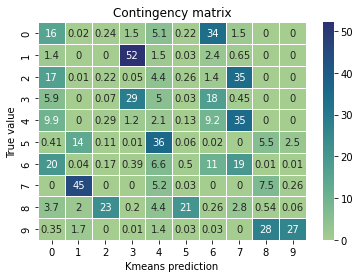

In [23]:
# compute and print the contingency matrix for the true labels vs the clustering assignments
#ADD CODE
import seaborn as sns
y_pred_kmeans = kmeans.predict(X_test)
c_matrix = metrics.cluster.contingency_matrix(y_test, y_pred_kmeans)

print(c_matrix)
sns.heatmap(c_matrix/100, annot=True, linewidth=.5, cmap="crest").set(title='Contingency matrix', xlabel='Kmeans prediction', ylabel='True value')
#

## TO DO 14
Based on the matrix shown above, comment on the results of clustering in terms of adherence to the true labels.

[ADD YOUR ANSWER HERE]

From the matrix above I can observe that the both precision and recall has poor scores, maybe because with only 2k samples for training the NN doesn't set the weights properly and made crass mistakes. On the first line, for example, the true value is *0* but the NN confused it with a *6* for the most part of the *0* samples. Even worse the second row, since almost all the *1* samples are wrongly predicted as a *3*.

## Choice of k with silhoutte coefficient
In many real applications it is unclear what is the correct value of $k$ to use. In practice one tries different values of $k$ and then uses some external score to choose a value of $k$. One such score is the silhoutte coefficient, that can be computed with metrics.silhouette_score(). See the definition of the silhoutte coefficient in the userguide.

## TO DO 15
Compute the clustering for k=2,3,...,15 (other parameters as above) and print the silhoutte coefficient for each such clustering.

In [24]:
#run k-means with 10 choices of initial centroids for a range of values of n_clusters

list_of_silhouttes = []
for i in range(2,16):
    #ADD CODE
    km = KMeans(n_clusters=i, n_init=10, random_state=ID)
    km.fit(X_train)
    #
    silhouttescore = metrics.silhouette_score(X_train, km.labels_) #COMPLETE
    list_of_silhouttes.append(silhouttescore)
    print("Silhoutte coefficient for number of clusters="+str(i)+": "+str(silhouttescore))

Silhoutte coefficient for number of clusters=2: 0.19754271562578468
Silhoutte coefficient for number of clusters=3: 0.18773386681349985
Silhoutte coefficient for number of clusters=4: 0.18412129982148184
Silhoutte coefficient for number of clusters=5: 0.1554018133385242
Silhoutte coefficient for number of clusters=6: 0.15953886840558987
Silhoutte coefficient for number of clusters=7: 0.16966591378503684
Silhoutte coefficient for number of clusters=8: 0.16750476746595422
Silhoutte coefficient for number of clusters=9: 0.1462882670007785
Silhoutte coefficient for number of clusters=10: 0.15430568526259572
Silhoutte coefficient for number of clusters=11: 0.137458101011402
Silhoutte coefficient for number of clusters=12: 0.13592777481047114
Silhoutte coefficient for number of clusters=13: 0.13460236090699748
Silhoutte coefficient for number of clusters=14: 0.12888127733529572
Silhoutte coefficient for number of clusters=15: 0.12459646075955395


Let us now plot how the silhouette coefficients change with respect to k.

Text(0.5, 1.0, 'Silhouette score per number of clusters')

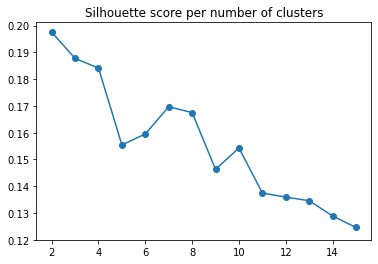

In [25]:
plt.plot([i for i in range(2,16)],list_of_silhouttes, "o-")
plt.gca().set_ylim(bottom=0.12)
plt.title("Silhouette score per number of clusters")

## TO DO 16

Based on the silhoutte score, which $k$ would you pick? Motivate your choice. Does your choice match what you know about the data? If yes, explain why you think this is the case; if no, explain what you think may be the reason.

[ADD YOUR ANSWER HERE]
Knowing that the siluette indicates how close each point in one cluster is to point in the neighboring clusters, I can say that the best *k* is 2 with coefficent 0.19. However we know that the best score we could have achived might be 1, so in my test the cluster are close to each other. In the end the result is the best I found but could have been better so is not the best.
From data I would have expected *k*=10 since there are 10 different classes. Seeing the result obtained my thought is that the data represented in a 3D space is forming two compact clusters (both very close to each other) of points that have something in common. One hypothesis is that one big group can be formed by the accessories (shoes, sandals and so on) and the other by the clothes (dresses, pullovers and so on). This because of similarities between the images of these groups.